# Overview

- We know that k-NN can be used in addressing regression problems.

- In this colab, we will demonstrate use of k-NN in regression setup with
  California housing dataset, where we try to predict price of a house based on
  its features.

### Importing

In [3]:
import sklearn

1.4.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# STEP 1: Training Data

In [5]:
X,y = fetch_california_housing(return_X_y=True)

In [6]:
print ("Shape of feature matrix:", X.shape)
print ("Shape of label vector:", y.shape)

Shape of feature matrix: (20640, 8)
Shape of label vector: (20640,)


In [7]:
assert (X.shape[0] == y.shape[0])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=8)
print ("Shape of training feature matrix", X_train.shape)
print ("Shape of test feature matrix", X_test.shape)

Shape of training feature matrix (14448, 8)
Shape of test feature matrix (6192, 8)


In [9]:
assert (X_train.shape[0] == y_train. shape [0])
assert (X_test.shape[0] == y_test. shape[0])

### Preprocessing the dataset

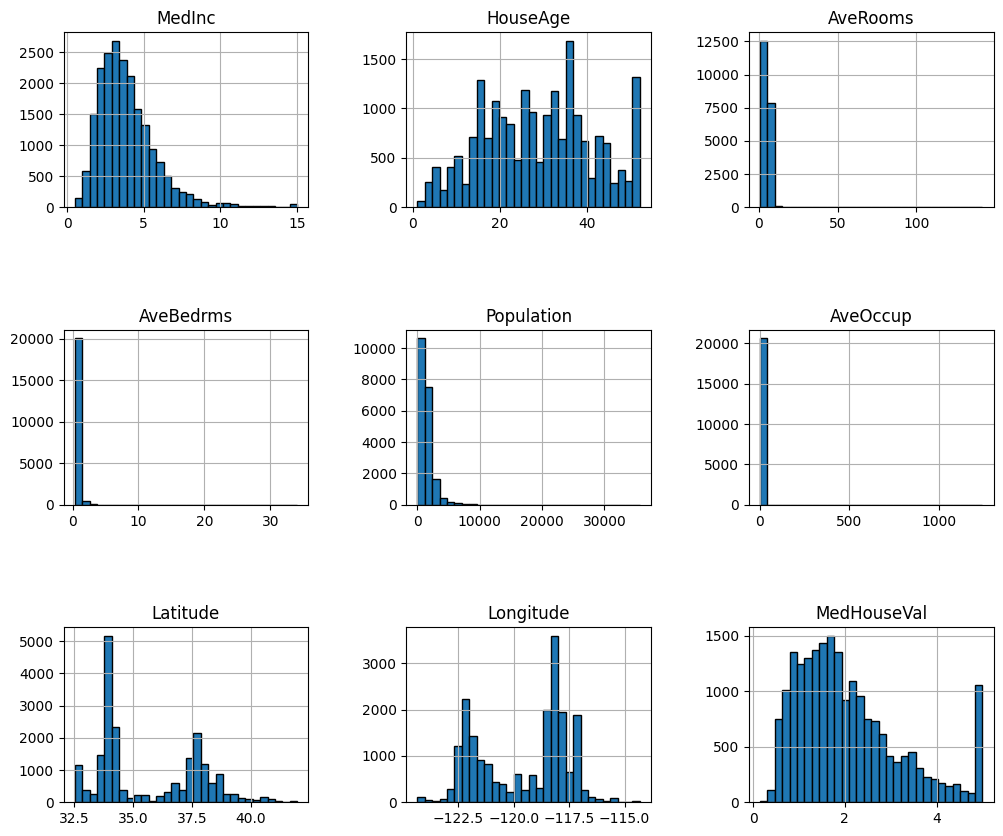

In [10]:
california_housing=fetch_california_housing(as_frame=True)
california_housing.frame.hist(figsize=(12,10), bins=30,edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# STEP 2: Model Building

In [11]:
# Create pipeline with min-max scaler followed by
# KNN regressor
pipe = Pipeline([('scaler', MinMaxScaler()),
('knn', KNeighborsRegressor(n_neighbors=2)) ])

#fitting and transform training data
pipe.fit(X_train, y_train)

#transform test data
y_pred = pipe.predict(X_test)

# compute RMSE
error = mean_squared_error(y_test, y_pred, squared=False)
print (error)

0.6767822465759739


c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# STEP 3: Model Selection and Evaluation
- k-NN classifier has k, the number of neighbors, as a hyperparameter.

- There are a couple of ways to tune the hyper-parameter:

1. Manual hyper-parameter tuning
2. Using GridSearchCV or RandomizedSearchCV.

- We demonstrate manual and grid search based hyperparameter tuning.

### Manual HPT with cross-validation

- Here we train and evaluate the model pipeline with different values of k - 1 to 31.

In [12]:
#to store rmse values for different k
rmse_val = []

for K in range(1,31):
    pipe = Pipeline([('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=K))])

    #fit the model
    pipe.fit(X_train, y_train)

    # make prediction on test set
    pred=pipe.predict(X_test)

    # calculate rmse
    error = mean_squared_error(y_test, pred, squared=False)

    #store rmse values
    rmse_val.append (error)

c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

- We plot the learning curve with k on x-axis and RMSE on y-axis.

- The value of k that results in the lowest RMSE is the best value of k that we select.

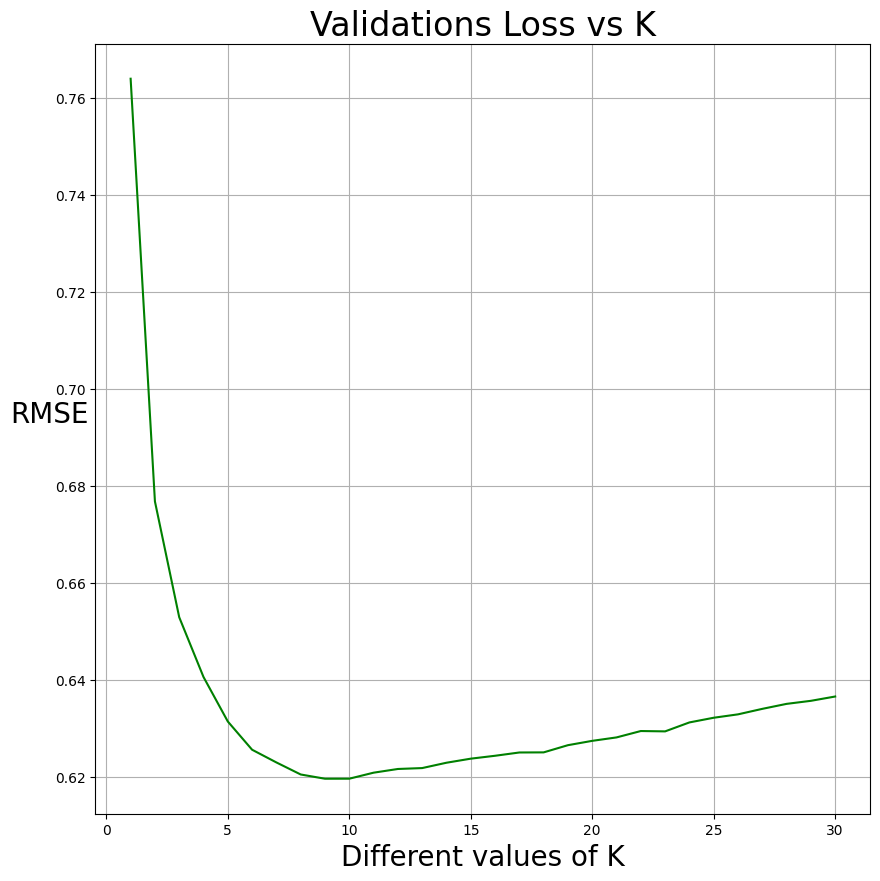

In [13]:
plt.figure(figsize=(10,10))

#plotting the rmse values against k values
plt.plot(range(1, len(rmse_val)+1), rmse_val, color='green')
plt.xlabel('Different values of K', fontsize=20)
plt.ylabel('RMSE', fontsize=20, rotation=0)
plt.grid(True)

# displaying the title
plt.title("Validations Loss vs K", fontsize=24)

plt.show()

In [14]:
# index=np.argmin(rmse_val)
print('Lowest rmse value comes when K is: {}'.format(np.argmin(rmse_val)+1))

Lowest rmse value comes when K is: 9


# HPT with GridSearchCV

- We set up the parameter grid for values of k of our interest.

- Here we use the value of k between 1 and 31.

- The object of GridSearchcv is instantiated with a KNeighborsRegressor estimator along with the parameter grid and number of cross-
validation folds equal to 10.

- The grid search is performed by calling the fit method with training feature matrix and labels as arguments.

In [17]:
param_grid = {"knn__n_neighbors": list(range(1, 31))}
print(param_grid)

pipe = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsRegressor())])

# validate model with his parameters
gs = GridSearchCV(
    estimator=pipe, param_grid=param_grid, cv=10, n_jobs=-1, return_train_score=True
)
gs.fit(X_train, y_train)

reg_knn = gs.best_estimator_
print(reg_knn)  # printing best estimator values

{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


In [19]:
print(gs.best_estimator_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


In [21]:
pred = gs.best_estimator_.predict(X_test) #make prediction on test set
error = mean_squared_error(y_test, pred, squared=False)
print ('RMSE value for k is: ', error)

RMSE value for k is:  0.6255268557053962


c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Polynomial Features

In [23]:
params = {"poly__degree": list(range(1, 4)), "knn__n_neighbors": list(range(6, 12))}
print(params)

pipe = Pipeline(
    steps=[
        ("poly", PolynomialFeatures()),
        ("scaler", MinMaxScaler()),
        ("knn", KNeighborsRegressor()),
    ]
)

gs = GridSearchCV(estimator=pipe, param_grid=params, cv=10, n_jobs=-1)

gs.fit(X_train, y_train)
reg_knn = gs.best_estimator_
print(reg_knn)

{'poly__degree': [1, 2, 3], 'knn__n_neighbors': [6, 7, 8, 9, 10, 11]}
Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


In [25]:
pred = gs.best_estimator_.predict(X_test) #make prediction on test set
error = mean_squared_error(y_test, pred, squared=False)
print ('RMSE value for k is: ', error)

RMSE value for k is:  0.6255268557053962


c:\Users\91820\Desktop\MLP-IIT\.env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import pandas